# Reducción de dimensionalidad - SVD

### 1. Ejemplo: compresión de una imagen

Vamos a empezar con un ejemplo simple, diferente a los que solemos utilizar. SVD puede ser usado en el contexto de imágenes para comprimir fotos. De esta forma, obtendrás una demostració "visual" del funcionamiento de SVS. En el notebook anterior viste que una imágen (en blanco y negro) es una matriz. Si en lugar de guardar la foto entera (Matriz M de la clase), uno guardase una representación reducida de esta matriz (B) y la manera de pasar de un espacio a otro (V*), entonces se podría ahorrar mucho espacio en el guardado de la foto. Este mismo proceso se utiliza a veces en imágenes y señales para reducir el ruido de las mismas (proceso llamado denoising).

El formalismo de SVD nos asegura que dado el rango que eligamos (r), la foto que podamos reconstruir a partir de B y V* (M moño) será la "mas parecida" posible a la foto original (M)

1. Primero cargamos la foto. Si no la tienen, deberán bajarse la libreria PIL para hacer este proceso mas fácil.

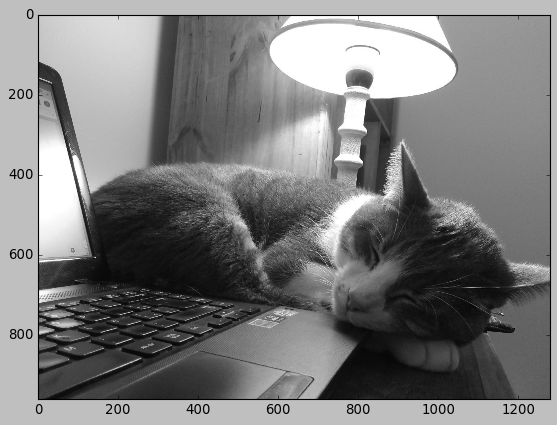

In [2]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('classic')
img = Image.open('../datasets/domo_dormido.jpeg')
# convert image to grayscale
imggray = img.convert('LA')
# convert to numpy array
imgmat = np.array(list(imggray.getdata(band=0)), float)
# Reshape according to orginal image dimensions
imgmat.shape = (imggray.size[1], imggray.size[0])

plt.figure(figsize=(9, 6))
plt.imshow(imgmat, cmap='gray')
plt.show()

In [3]:
imgmat.shape

(960, 1280)

2. Vamos a usar la versión clasica del algoritmo de SVD que viene en Numpy (noten que importante que es, que viene por default en Numpy, ya que se usa para muchas más cosas).

In [4]:
U, D, V = np.linalg.svd(imgmat)

3. Inspeccionemos la dimensión de los elementos:

In [5]:
imgmat.shape

(960, 1280)

In [6]:
U.shape

(960, 960)

In [7]:
D.shape

(960,)

In [8]:
V.shape

(1280, 1280)

4. Así como está, si multiplicamos adecuadamente estos tres elementos, recuperariamos la foto original. Veamos que si tomamos los 960 valores singulares tendremos la imagen original nuevamente:

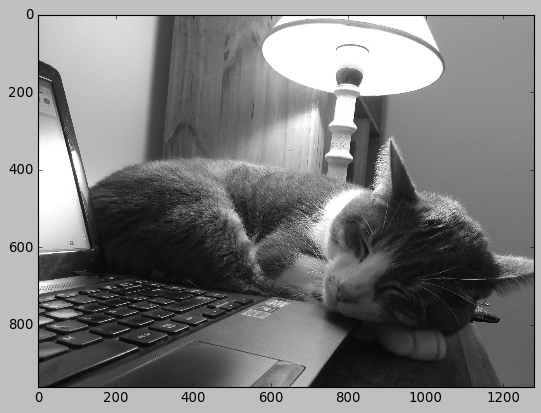

In [9]:
reconstimg = np.matrix(U[:, :imgmat.shape[0]]) * np.diag(D[:imgmat.shape[0]]) * np.matrix(V[:imgmat.shape[0], :])
plt.imshow(reconstimg, cmap='gray')
plt.show()

5. El objetivo pasa por tomar unicamente los valores singulares más altos. Por una cuestión de comodidad, los valores en D (notar que representa una matriz diagonal pero viene en forma de vector!) ya están ordenados de menor a mayor, siendo los primeros los de mayor valor. Ahora sí, vamos a probar tomando menos valores singulares, empecemos por sólo 3.

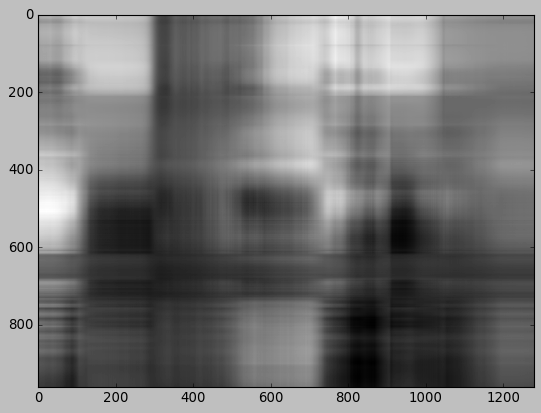

In [10]:
reconstimg = np.matrix(U[:, :3]) * np.diag(D[:3]) * np.matrix(V[:3, :])
plt.imshow(reconstimg, cmap='gray')
plt.show()

6. No es muy sorprendente el resultado, pero ya se puede al menos ver que hay un objeto en el centro de la imagen. Para tener tan poca información (sólo los tres vectores propios asociados a los valores propios y los vectores propios) no está tan mal. Ahora si, barramos una cantidad más razonable de valores singulares, y observemos los resultados.

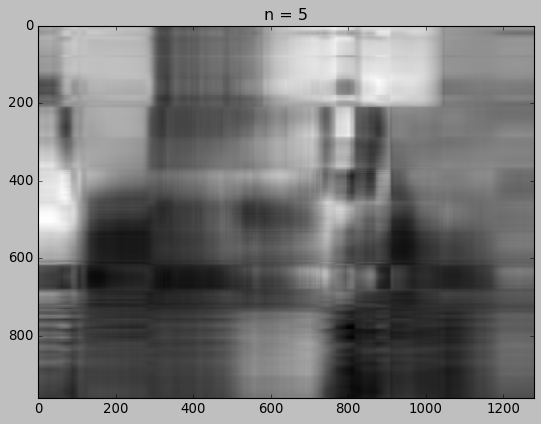

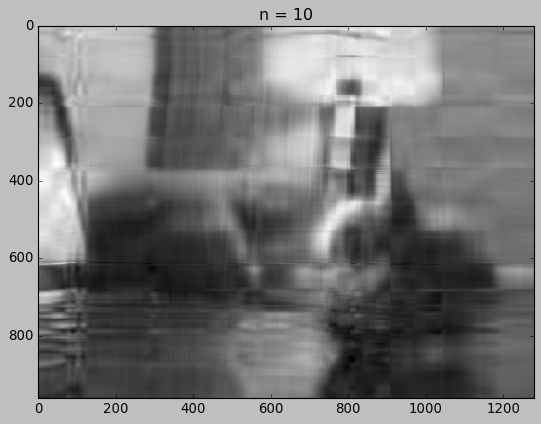

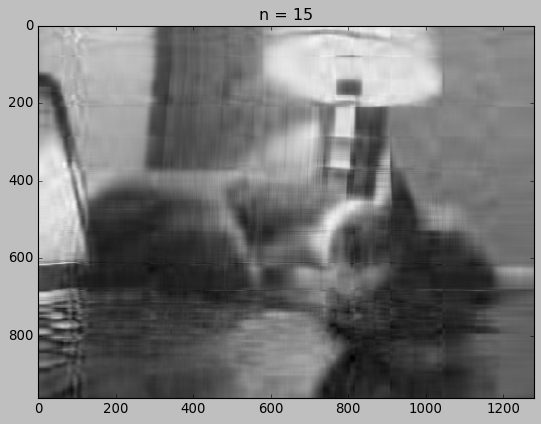

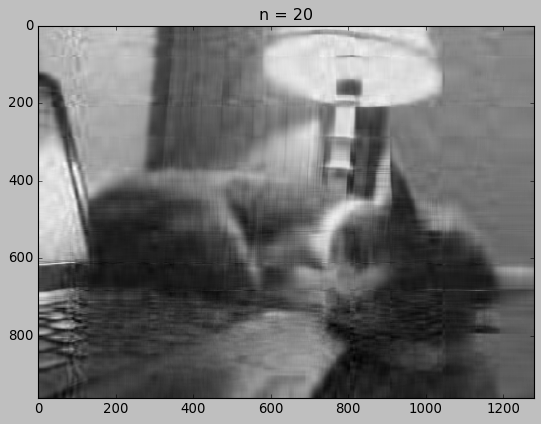

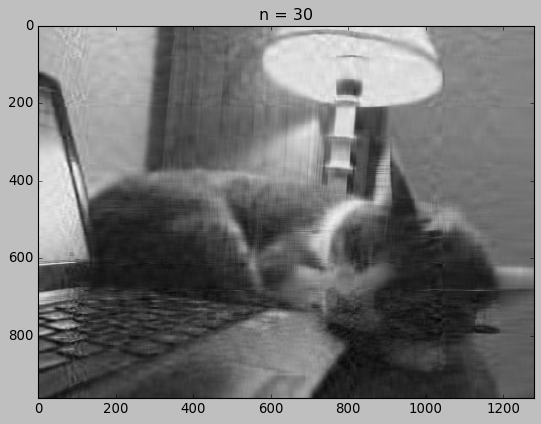

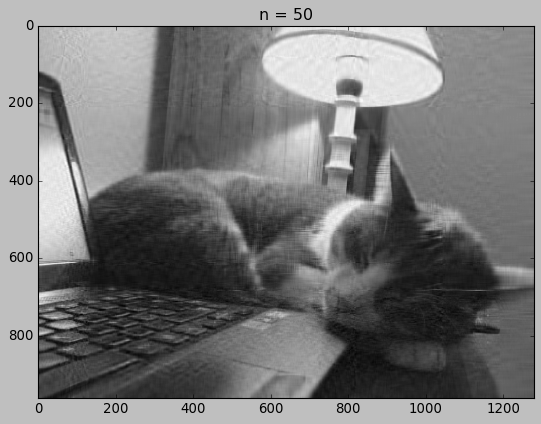

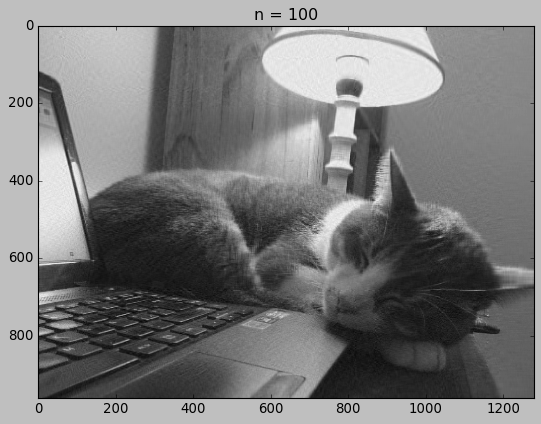

In [11]:
for i in [5, 10, 15, 20, 30, 50,100]:
    reconstimg = np.matrix(U[:, :i]) * np.diag(D[:i]) * np.matrix(V[:i, :])
    plt.imshow(reconstimg, cmap='gray')
    title = "n = %s" % i
    plt.title(title)
    plt.show()

## 2. ¡A probar con un dataset!

Así como hiciste con Clustering, es momento de probar estas técnicas con un dataset de tu elección. Para hacerlo, te recomendamos que mires atentamente la [documentación de Scikit-Learn](https://scikit-learn.org/stable/modules/decomposition.html) y que utilices una implementación de SVD de esa librería, preferiblemente [`TruncatedSVD`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html). Es importante que mires la documentación de esa clase, en particular el ejemplo para comenzar. ¡Ya es hora de aprender solo/a cómo aplicar una herramienta nueva!

In [31]:
from sklearn.decomposition import TruncatedSVD
import pandas as pd
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
import seaborn as sns

In [15]:
iris = pd.read_csv("../datasets/DS_Bitácora_04_Iris.csv")
# Eliminamos el id
iris.drop('Id', axis=1, inplace=True)
# De nuestros datos solo nos interesa los "labels", ya que es un no supervisado y no tenemos target
X = np.array(iris.drop('Species', axis=1))

In [16]:
# nos vamos a quedar con dos features
svd = TruncatedSVD(2)

In [18]:
iris_transformed = svd.fit_transform(X)

<AxesSubplot:>

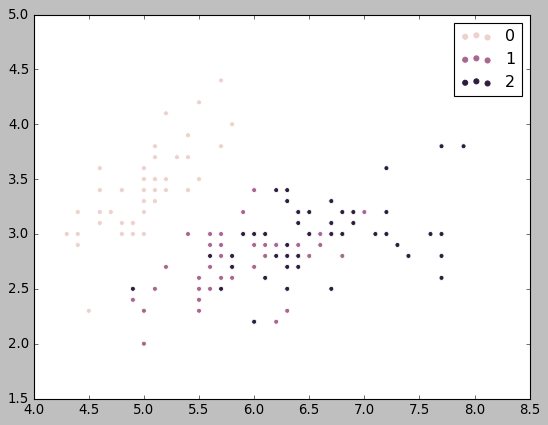

In [32]:
sns.scatterplot(X[:,0], X[:,1], hue=labelencoder.fit_transform(iris['Species']),legend ='full')